In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('hmnist_28_28_RGB.csv')

In [3]:
df.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [4]:
fractions=np.array([0.8,0.2])
df=df.sample(frac=1)
train_set, test_set = np.array_split(
    df, (fractions[:-1].cumsum() * len(df)).astype(int))
     
df.label.unique()

array([6, 1, 4, 2, 0, 5, 3], dtype=int64)

In [5]:
classes={0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),
         1:('bcc' , 'basal cell carcinoma'),
         2:('bkl', 'benign keratosis-like lesions'),
         3:('df', 'dermatofibroma'),
         4:('nv', ' melanocytic nevi'),
         5:('vasc', ' pyogenic granulomas and hemorrhage'),
         6:('mel', 'melanoma'),}
     

y_train=train_set['label']
x_train=train_set.drop(columns=['label'])
y_test=test_set['label']
x_test=test_set.drop(columns=['label'])

columns=list(x_train)

<AxesSubplot:xlabel='label', ylabel='count'>

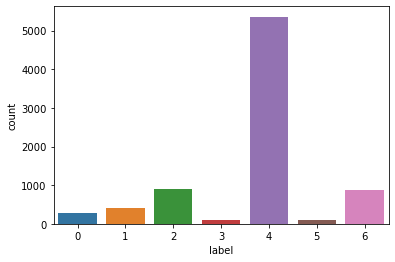

In [6]:
import seaborn as sns

sns.countplot(train_set['label'])

In [7]:
from imblearn.over_sampling import RandomOverSampler 
oversample = RandomOverSampler()
x_train,y_train  = oversample.fit_resample(x_train,y_train)

<AxesSubplot:xlabel='label', ylabel='count'>

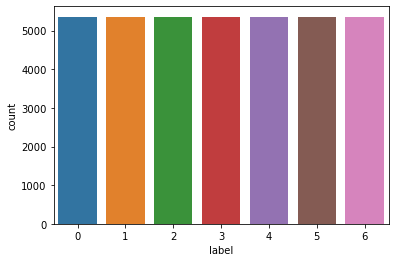

In [8]:
sns.countplot(y_train)

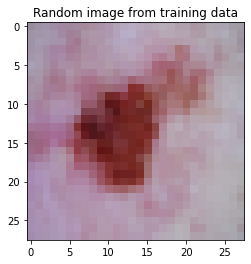

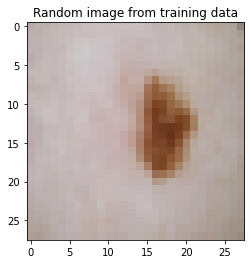

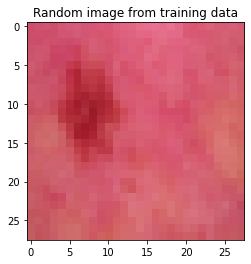

In [9]:
import matplotlib.pyplot as plt
import random
num=random.randint(0,8000)
x_train=np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()
num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf
     

model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(256, kernel_size = (3,3), activation = 'relu'))
model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0

In [12]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='model2.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1, save_best_only=True)
     

optimizer=tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer =optimizer,
              metrics = ['accuracy'])
history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 50,
                    shuffle=True,
                    callbacks=[callback])


Epoch 1/50
235/235 [==============================] - ETA: 0s - loss: 0.0313 - accuracy: 0.9898WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 48s 182ms/step - loss: 0.0313 - accuracy: 0.9898 - val_loss: 0.1335 - val_accuracy: 0.9389
Epoch 2/50
235/235 [==============================] - ETA: 0s - loss: 0.0265 - accuracy: 0.9910WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 40s 169ms/step - loss: 0.0265 - accuracy: 0.9910 - val_loss: 0.4953 - val_accuracy: 0.8406
Epoch 3/50
235/235 [==============================] - ETA: 0s - loss: 0.0332 - accuracy: 0.9890WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 36s 155ms/step - loss: 0.0332 - accuracy: 0.9890 - val_loss: 0.1742 - val_accuracy: 0.9433
Epoch 4/50
235/235 [==============================] - ETA: 0s - loss: 0.0275 - accuracy: 0.9914WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 32s 138ms/step - loss: 0.0275 - accuracy: 0.9914 - val_loss: 0.2350 - val_accuracy: 0.9190
Epoch 5/50
235/235 [==============================] - ETA: 0s - loss: 0.0175 - accuracy: 0.9941WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 29s 125ms/step - loss: 0.0175 - accuracy: 0.9941 - val_loss: 0.1095 - val_accuracy: 0.9567
Epoch 6/50
235/235 [==============================] - ETA: 0s - loss: 0.0199 - accuracy: 0.9935WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 29s 125ms/step - loss: 0.0199 - accuracy: 0.9935 - val_loss: 0.0886 - val_accuracy: 0.9672
Epoch 7/50
235/235 [==============================] - ETA: 0s - loss: 0.0321 - accuracy: 0.9896WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 29s 125ms/step - loss: 0.0321 - accuracy: 0.9896 - val_loss: 0.4708 - val_accuracy: 0.8540
Epoch 8/50
235/235 [==============================] - ETA: 0s - loss: 0.0210 - accuracy: 0.9935WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 29s 124ms/step - loss: 0.0210 - accuracy: 0.9935 - val_loss: 0.4687 - val_accuracy: 0.8443
Epoch 9/50
235/235 [==============================] - ETA: 0s - loss: 0.0233 - accuracy: 0.9924WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 30s 129ms/step - loss: 0.0233 - accuracy: 0.9924 - val_loss: 0.0787 - val_accuracy: 0.9731
Epoch 10/50
235/235 [==============================] - ETA: 0s - loss: 0.0253 - accuracy: 0.9915WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 34s 145ms/step - loss: 0.0253 - accuracy: 0.9915 - val_loss: 0.2310 - val_accuracy: 0.9405
Epoch 11/50
235/235 [==============================] - ETA: 0s - loss: 0.0170 - accuracy: 0.9945WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 30s 126ms/step - loss: 0.0170 - accuracy: 0.9945 - val_loss: 0.0778 - val_accuracy: 0.9756
Epoch 12/50
235/235 [==============================] - ETA: 0s - loss: 0.0146 - accuracy: 0.9955WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 30s 127ms/step - loss: 0.0146 - accuracy: 0.9955 - val_loss: 0.0259 - val_accuracy: 0.9892
Epoch 13/50
235/235 [==============================] - ETA: 0s - loss: 0.0176 - accuracy: 0.9946WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 30s 128ms/step - loss: 0.0176 - accuracy: 0.9946 - val_loss: 0.2083 - val_accuracy: 0.9384
Epoch 14/50
235/235 [==============================] - ETA: 0s - loss: 0.0133 - accuracy: 0.9957WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 36s 154ms/step - loss: 0.0133 - accuracy: 0.9957 - val_loss: 0.0098 - val_accuracy: 0.9965
Epoch 15/50
235/235 [==============================] - ETA: 0s - loss: 0.0095 - accuracy: 0.9973WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 43s 181ms/step - loss: 0.0095 - accuracy: 0.9973 - val_loss: 0.1040 - val_accuracy: 0.9668
Epoch 16/50
235/235 [==============================] - ETA: 0s - loss: 0.0281 - accuracy: 0.9920WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 46s 194ms/step - loss: 0.0281 - accuracy: 0.9920 - val_loss: 0.0251 - val_accuracy: 0.9896
Epoch 17/50
235/235 [==============================] - ETA: 0s - loss: 0.0149 - accuracy: 0.9957WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 47s 199ms/step - loss: 0.0149 - accuracy: 0.9957 - val_loss: 0.2939 - val_accuracy: 0.9211
Epoch 18/50
235/235 [==============================] - ETA: 0s - loss: 0.0129 - accuracy: 0.9961WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 52s 223ms/step - loss: 0.0129 - accuracy: 0.9961 - val_loss: 0.7839 - val_accuracy: 0.8271
Epoch 19/50
235/235 [==============================] - ETA: 0s - loss: 0.0223 - accuracy: 0.9935WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 42s 180ms/step - loss: 0.0223 - accuracy: 0.9935 - val_loss: 0.0389 - val_accuracy: 0.9868
Epoch 20/50
235/235 [==============================] - ETA: 0s - loss: 0.0091 - accuracy: 0.9973WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 36s 152ms/step - loss: 0.0091 - accuracy: 0.9973 - val_loss: 0.0189 - val_accuracy: 0.9928
Epoch 21/50
235/235 [==============================] - ETA: 0s - loss: 0.0131 - accuracy: 0.9957WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 36s 152ms/step - loss: 0.0131 - accuracy: 0.9957 - val_loss: 0.4954 - val_accuracy: 0.8530
Epoch 22/50
235/235 [==============================] - ETA: 0s - loss: 0.0129 - accuracy: 0.9958WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 37s 156ms/step - loss: 0.0129 - accuracy: 0.9958 - val_loss: 0.0354 - val_accuracy: 0.9848
Epoch 23/50
235/235 [==============================] - ETA: 0s - loss: 0.0152 - accuracy: 0.9952WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 41s 174ms/step - loss: 0.0152 - accuracy: 0.9952 - val_loss: 0.2361 - val_accuracy: 0.9242
Epoch 24/50
235/235 [==============================] - ETA: 0s - loss: 0.0222 - accuracy: 0.9928WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 41s 173ms/step - loss: 0.0222 - accuracy: 0.9928 - val_loss: 0.1148 - val_accuracy: 0.9641
Epoch 25/50
235/235 [==============================] - ETA: 0s - loss: 0.0144 - accuracy: 0.9953WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 39s 166ms/step - loss: 0.0144 - accuracy: 0.9953 - val_loss: 0.2405 - val_accuracy: 0.9318
Epoch 26/50
235/235 [==============================] - ETA: 0s - loss: 0.0128 - accuracy: 0.9960WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 37s 159ms/step - loss: 0.0128 - accuracy: 0.9960 - val_loss: 0.1131 - val_accuracy: 0.9607
Epoch 27/50
235/235 [==============================] - ETA: 0s - loss: 0.0060 - accuracy: 0.9985WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 41s 174ms/step - loss: 0.0060 - accuracy: 0.9985 - val_loss: 0.0631 - val_accuracy: 0.9769
Epoch 28/50
235/235 [==============================] - ETA: 0s - loss: 0.0089 - accuracy: 0.9974WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 45s 193ms/step - loss: 0.0089 - accuracy: 0.9974 - val_loss: 0.0354 - val_accuracy: 0.9888
Epoch 29/50
235/235 [==============================] - ETA: 0s - loss: 0.0139 - accuracy: 0.9961WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 42s 177ms/step - loss: 0.0139 - accuracy: 0.9961 - val_loss: 0.2838 - val_accuracy: 0.9134
Epoch 30/50
235/235 [==============================] - ETA: 0s - loss: 0.0113 - accuracy: 0.9965WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 41s 175ms/step - loss: 0.0113 - accuracy: 0.9965 - val_loss: 0.1190 - val_accuracy: 0.9643
Epoch 31/50
235/235 [==============================] - ETA: 0s - loss: 0.0090 - accuracy: 0.9968WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 44s 186ms/step - loss: 0.0090 - accuracy: 0.9968 - val_loss: 0.0193 - val_accuracy: 0.9931
Epoch 32/50
235/235 [==============================] - ETA: 0s - loss: 0.0155 - accuracy: 0.9954WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 46s 196ms/step - loss: 0.0155 - accuracy: 0.9954 - val_loss: 0.3272 - val_accuracy: 0.9130
Epoch 33/50
235/235 [==============================] - ETA: 0s - loss: 0.0120 - accuracy: 0.9967WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 37s 159ms/step - loss: 0.0120 - accuracy: 0.9967 - val_loss: 0.0062 - val_accuracy: 0.9976
Epoch 34/50
235/235 [==============================] - ETA: 0s - loss: 0.0150 - accuracy: 0.9957WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 39s 166ms/step - loss: 0.0150 - accuracy: 0.9957 - val_loss: 0.2377 - val_accuracy: 0.9267
Epoch 35/50
235/235 [==============================] - ETA: 0s - loss: 0.0125 - accuracy: 0.9963WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 34s 143ms/step - loss: 0.0125 - accuracy: 0.9963 - val_loss: 0.1807 - val_accuracy: 0.9473
Epoch 36/50
235/235 [==============================] - ETA: 0s - loss: 0.0084 - accuracy: 0.9975WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 32s 137ms/step - loss: 0.0084 - accuracy: 0.9975 - val_loss: 0.5824 - val_accuracy: 0.8582
Epoch 37/50
235/235 [==============================] - ETA: 0s - loss: 0.0107 - accuracy: 0.9967WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 45s 190ms/step - loss: 0.0107 - accuracy: 0.9967 - val_loss: 1.2497 - val_accuracy: 0.7474
Epoch 38/50
235/235 [==============================] - ETA: 0s - loss: 0.0120 - accuracy: 0.9959WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 44s 187ms/step - loss: 0.0120 - accuracy: 0.9959 - val_loss: 0.1249 - val_accuracy: 0.9679
Epoch 39/50
235/235 [==============================] - ETA: 0s - loss: 0.0160 - accuracy: 0.9953WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 36s 154ms/step - loss: 0.0160 - accuracy: 0.9953 - val_loss: 0.0627 - val_accuracy: 0.9785
Epoch 40/50
235/235 [==============================] - ETA: 0s - loss: 0.0079 - accuracy: 0.9974WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 39s 166ms/step - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.0433 - val_accuracy: 0.9900
Epoch 41/50
235/235 [==============================] - ETA: 0s - loss: 0.0086 - accuracy: 0.9972WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 36s 155ms/step - loss: 0.0086 - accuracy: 0.9972 - val_loss: 0.0846 - val_accuracy: 0.9756
Epoch 42/50
235/235 [==============================] - ETA: 0s - loss: 0.0069 - accuracy: 0.9980WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 39s 164ms/step - loss: 0.0069 - accuracy: 0.9980 - val_loss: 0.0293 - val_accuracy: 0.9891
Epoch 43/50
235/235 [==============================] - ETA: 0s - loss: 0.0074 - accuracy: 0.9974WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 40s 170ms/step - loss: 0.0074 - accuracy: 0.9974 - val_loss: 0.4440 - val_accuracy: 0.8871
Epoch 44/50
235/235 [==============================] - ETA: 0s - loss: 0.0068 - accuracy: 0.9976WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 39s 165ms/step - loss: 0.0068 - accuracy: 0.9976 - val_loss: 0.0020 - val_accuracy: 0.9989
Epoch 45/50
235/235 [==============================] - ETA: 0s - loss: 0.0076 - accuracy: 0.9978WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 44s 186ms/step - loss: 0.0076 - accuracy: 0.9978 - val_loss: 0.2870 - val_accuracy: 0.9210
Epoch 46/50
235/235 [==============================] - ETA: 0s - loss: 0.0176 - accuracy: 0.9951WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 56s 236ms/step - loss: 0.0176 - accuracy: 0.9951 - val_loss: 0.0034 - val_accuracy: 0.9987
Epoch 47/50
235/235 [==============================] - ETA: 0s - loss: 0.0080 - accuracy: 0.9976WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 60s 254ms/step - loss: 0.0080 - accuracy: 0.9976 - val_loss: 0.0148 - val_accuracy: 0.9933
Epoch 48/50
235/235 [==============================] - ETA: 0s - loss: 0.0047 - accuracy: 0.9989WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 59s 253ms/step - loss: 0.0047 - accuracy: 0.9989 - val_loss: 3.2013 - val_accuracy: 0.5057
Epoch 49/50
235/235 [==============================] - ETA: 0s - loss: 0.0131 - accuracy: 0.9965WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 48s 203ms/step - loss: 0.0131 - accuracy: 0.9965 - val_loss: 0.0782 - val_accuracy: 0.9764
Epoch 50/50
235/235 [==============================] - ETA: 0s - loss: 0.0081 - accuracy: 0.9978WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 35s 149ms/step - loss: 0.0081 - accuracy: 0.9978 - val_loss: 0.0132 - val_accuracy: 0.9961


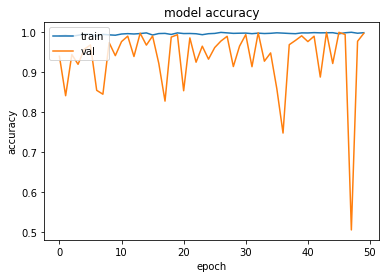

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


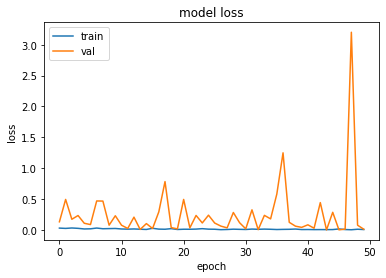

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [15]:
model.save('model2.h5')
model.load_weights('model2.h5')
x_test=np.array(x_test).reshape(-1,28,28,3)
loss, acc = model.evaluate(x_test, y_test, verbose=2)

63/63 - 1s - loss: 1.5639 - accuracy: 0.7454 - 858ms/epoch - 14ms/step


In [16]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

63/63 [==============================] - 1s 8ms/step
[[  17   14   11    0    9    0    7]
 [  10   48    8    5   21    2   10]
 [   6    9   93    2   83    1   13]
 [   2    0    4    7    7    0    0]
 [   3   14   46    2 1232    1   49]
 [   0    2    2    0    9   25    0]
 [   7    9   31    0  110    1   71]]


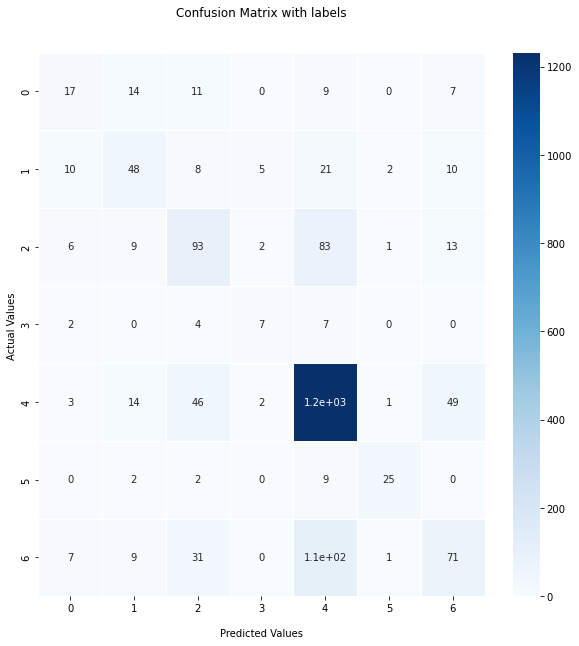

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(conf_mat, annot=True, cmap='Blues', linewidths=.9, ax=ax)
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])
ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])
plt.show()

In [19]:
import sklearn
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.29      0.33        58
           1       0.50      0.46      0.48       104
           2       0.48      0.45      0.46       207
           3       0.44      0.35      0.39        20
           4       0.84      0.91      0.87      1347
           5       0.83      0.66      0.74        38
           6       0.47      0.31      0.37       229

    accuracy                           0.75      2003
   macro avg       0.56      0.49      0.52      2003
weighted avg       0.72      0.75      0.73      2003

